In [110]:
import numpy as np
from mlxtend.plotting import plot_decision_regions
from pydotplus import graph_from_dot_data
import seaborn as sns
import pandas as pd
import mglearn

import sklearn as sk
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from IPython.display import Image

%matplotlib inline
import matplotlib.pyplot as plt

In [111]:
from sklearn.datasets import load_iris
iris = load_iris()

X_iris = iris.data
y_iris = iris.target

print('Class labels{}, which correspond to species {}'.format(np.unique(y_iris), iris['target_names']))

Class labels[0 1 2], which correspond to species ['setosa' 'versicolor' 'virginica']


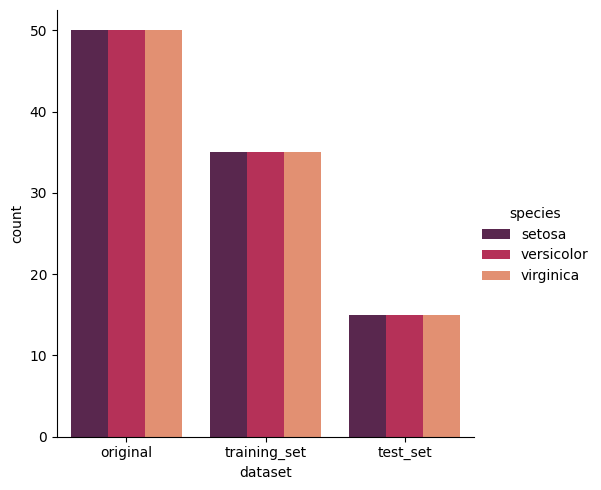

In [117]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, 
                                                                        test_size=0.3, 
                                                                        random_state=1, 
                                                                        stratify=y_iris) # ensure the distribution of labels will be the same in the training and test sets as they are in the original dataset

iris_label_df = pd.DataFrame(iris['target_names'], columns=['species'])
iris_label_df = iris_label_df.assign(original = np.bincount(y_iris),            # count number of occurrences of each value in array of non-negative ints
                                     training_set = np.bincount(y_iris_train), 
                                     test_set = np.bincount(y_iris_test))

iris_label_df = pd.DataFrame.melt(iris_label_df, id_vars='species')
iris_label_df.rename(columns={'variable':'dataset', 'value':'count'}, inplace=True)

sns.catplot(data=iris_label_df, x="dataset", y="count", hue="species", kind="bar", palette='rocket')

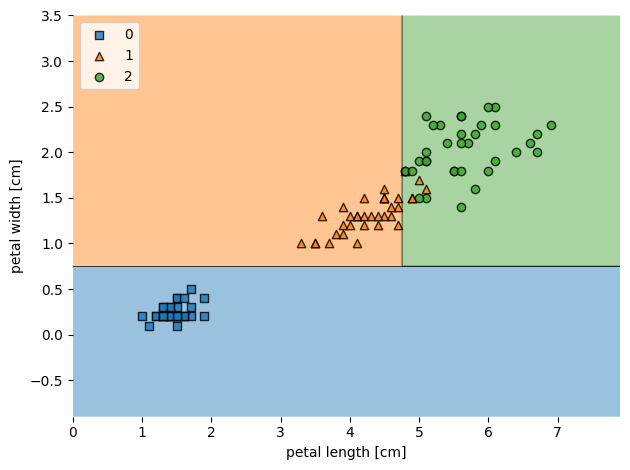

In [118]:
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=2, 
                              random_state=1)
tree.fit(X_iris_train[:, 2:4], y_iris_train)


plot_decision_regions(X_iris_train[:, 2:4], y_iris_train, tree)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()